<a href="https://colab.research.google.com/github/skbhat1234/VizML-Project-Track2/blob/main/HighCorrelationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

In [4]:
n_samples=500
n_features=2
num_centers=3
random_state=1
return_centers=True

x, y, centers = make_blobs(n_samples=n_samples, 
                           n_features=n_features, 
                           centers=num_centers, 
                           random_state=random_state, 
                           return_centers=return_centers)

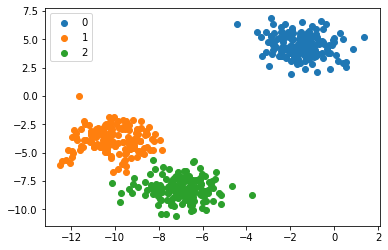

In [5]:
fig, ax = plt.subplots()
for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(x[i, 0], x[i, 1], label=g)
ax.legend()
plt.show()

In [6]:
covariance = cov(x[:,0], x[:, 1])
covariance

array([[13.49327047, 14.10743572],
       [14.10743572, 28.47459066]])

In [7]:
correlation = covariance/(std(x[:,0])*std(x[:,1]))
correlation

array([[0.6897621 , 0.72115759],
       [0.72115759, 1.45559177]])

In [8]:
corr, _ = pearsonr(x[:,0], x[:, 1])
corr

0.7197152787407661

In [9]:
!pip install lime shap

     |████████████████████████████████| 275 kB 16.1 MB/s 
     |████████████████████████████████| 564 kB 50.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f4e102f09d78bb961626b613d03866d4af227385cab9e8f7de28b102fe432f62
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import lime
import lime.lime_tabular

In [11]:
y.reshape(-1, 1).shape

(500, 1)

In [12]:
df = pd.DataFrame(x, columns = ['Feature1', 'Feature2'])
df['label'] = y
df

,Feature1,Feature2,label
0,-10.140908,-2.920365,1
1,-10.849168,-2.952467,1
2,-7.871060,-8.104166,2
3,0.531140,2.510129,0
4,-5.995896,-8.362981,2
...,...,...,...
495,-10.561501,-3.863662,1
496,-5.845008,-9.287020,2
497,-7.082700,-8.753367,2
498,-2.520876,5.081201,0


In [13]:
x = df[['Feature1', 'Feature2']]
y = df['label']

s = MinMaxScaler()
x[x.columns] = s.fit_transform(x[x.columns])

X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.10, random_state=2022)

clf = MLPClassifier(max_iter=100, random_state=2022)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=100, random_state=2022)

Intercept 0.38829873659810665
Prediction_local [0.3492318]
Right: 0.23708299715573872


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


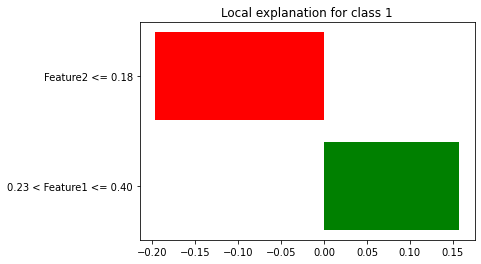

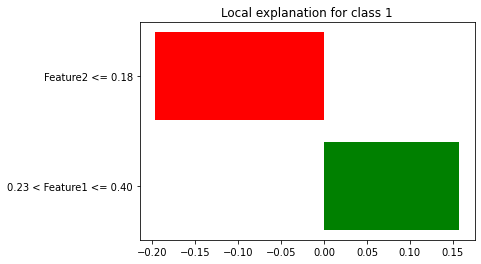

In [16]:
# Train an LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                   feature_names = X_test.columns,
                                                   class_names = ['0', '1', '2'],
                                                   discretize_continuous = True, #Non categorical features will be put into buckets (discretized)
                                                   verbose = True,
                                                   mode='classification',
                                                   random_state=2002
)

exp = explainer_lime.explain_instance(X_test.iloc[2], clf.predict_proba, num_features=2, num_samples=100)
exp.as_pyplot_figure()

In [79]:
import warnings
warnings.filterwarnings("ignore")


import shap
K = 200
explainerShap = shap.KernelExplainer(clf.predict_proba, shap.sample(X_train, K))
shap_values = explainerShap.shap_values(X_test[:100], n_samples=50)

len(shap_values)#.shape

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/50 [00:00<?, ?it/s]

3

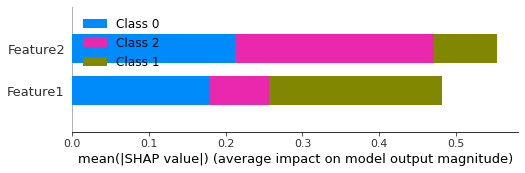

In [78]:
shap.summary_plot(shap_values, X_test[:100], plot_type='bar')

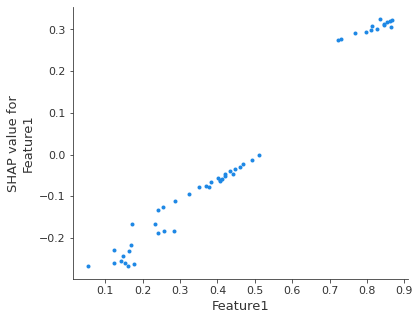

In [19]:
#X_test.columns
shap.dependence_plot('Feature1', shap_values[0], X_test[:100], interaction_index=None)

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test[:100])

### Similarity and Stability

In [74]:
#Identify Idices for each cluster
#fig, ax = plt.subplots()
for g in np.unique(y_test):
    i = np.where(y_test == g)
    #ax.scatter(X_test.iloc[i]['Feature1'], X_test.iloc[i]['Feature2'], label=g)
    print(i[0:2])
#ax.legend()
#plt.show()

(array([ 1,  5, 11, 17, 23, 24, 29, 31, 32, 34, 36, 42, 43, 48]),)
(array([ 6, 10, 12, 13, 18, 21, 26, 27, 28, 33, 37, 38, 41, 44, 49]),)
(array([ 0,  2,  3,  4,  7,  8,  9, 14, 15, 16, 19, 20, 22, 25, 30, 35, 39,
       40, 45, 46, 47]),)


In [75]:
#Get 2 similar instances from class 0
idx_0 = np.array([17, 23])
X_test.iloc[idx_0]

,Feature1,Feature2
159,0.721737,0.809080
485,0.729273,0.809815


Intercept 0.395303612791564
Prediction_local [0.28670077]
Right: 0.06083657087594081


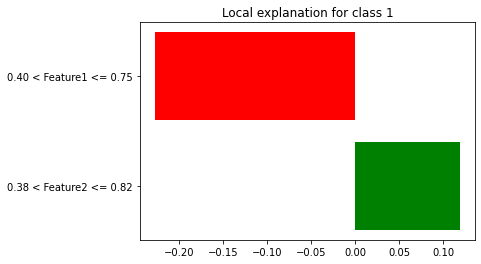

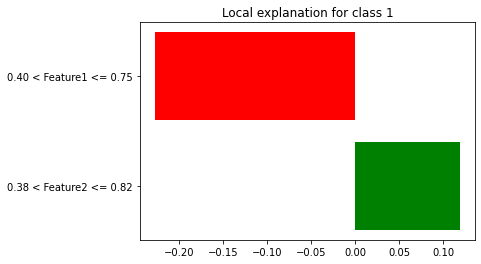

In [72]:
#Plot LIME for first instance
explime_1 = explainer_lime.explain_instance(X_test.iloc[17], clf.predict_proba, num_features=2, num_samples=100)
explime_1.as_pyplot_figure()

Intercept 0.40573264255261227
Prediction_local [0.29261404]
Right: 0.05730503289320075


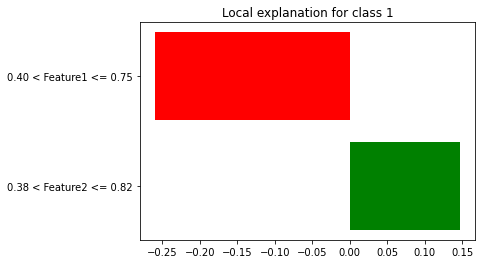

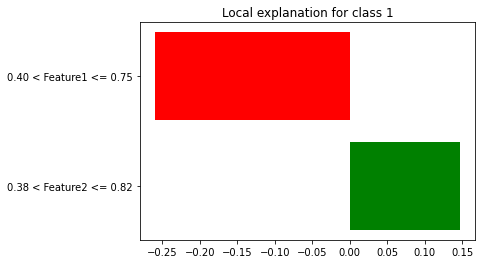

In [71]:
#Plot LIME for first instance
explime_2 = explainer_lime.explain_instance(X_test.iloc[23], clf.predict_proba, num_features=2, num_samples=100)
explime_2.as_pyplot_figure()

For Highly correlated data with 3 clusters and two labels, we see that MLP-derived LIME explanations are Stable and Similar for similar instances of test data, when using 100 samples.

In [98]:
#Get shap for first instanct
shap.force_plot(explainerShap.expected_value[2], shap_values[2], X_test.iloc[17])

IndexError: ignored

### Separability

In [99]:
#Get 2 dissimilar instances from class 0
idx_1 = np.array([1, 6])
X_test.iloc[idx_1]

,Feature1,Feature2
116,0.867973,0.870183
411,0.123015,0.363544


Intercept 0.4782337765003182
Prediction_local [0.0739708]
Right: 0.018252479136822167


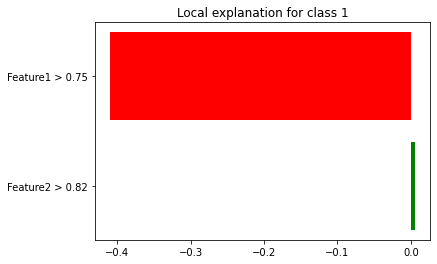

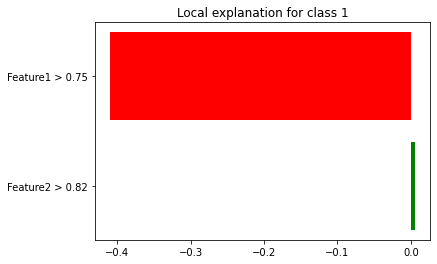

In [100]:
#Plot LIME for first instance
explime_3 = explainer_lime.explain_instance(X_test.iloc[1], clf.predict_proba, num_features=2, num_samples=100)
explime_3.as_pyplot_figure()

Intercept 0.2979621581967419
Prediction_local [0.67323338]
Right: 0.8071518781907342


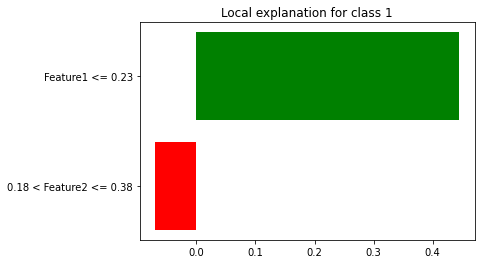

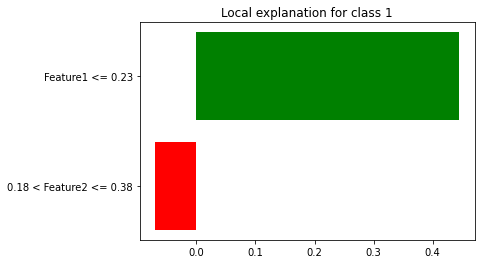

In [101]:
#Plot LIME for first instance
explime_4 = explainer_lime.explain_instance(X_test.iloc[6], clf.predict_proba, num_features=2, num_samples=100)
explime_4.as_pyplot_figure()

For Highly correlated data with 3 clusters and two labels, we see that MLP-derived LIME explanations preserved separability for dissimilar instances of test data, when using 100 samples.